### **Importing necessary libraries**

In [ ]:
install.packages('readr')
install.packages('proxy')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(readr)
library(proxy)


Attaching package: ‘proxy’


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix




### **Importing the data**

In [ ]:
df_usa <- read_csv("/content/merged_usa_dataset.csv")

head(df_usa)

Rows: 57 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Entity
dbl (21): Year, Renewables (% electricity), Renewables (% equivalent primary...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Entity,Year,Renewables (% electricity),Renewables (% equivalent primary energy),Biofuels Production - TWh - Total,Solar (% electricity),Hydro (% equivalent primary energy),Electricity from hydro (TWh),Electricity from wind (TWh),Hydro (% electricity),⋯,Electricity from solar (TWh),Other renewables including bioenergy (TWh),Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Geothermal Capacity,Wind (% equivalent primary energy),Wind Capacity,Solar (% equivalent primary energy)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
United States,1965,0,4.368870,0,0,4.074629,397.9482,0,0,⋯,0,13.33223,13.33223,0,0,198.9741,0,0,0,0
United States,1966,0,4.171402,0,0,3.877466,399.8738,0,0,⋯,0,14.06201,14.06201,0,0,199.9369,0,0,0,0
United States,1967,0,4.542216,0,0,4.258249,454.4416,0,0,⋯,0,14.07357,14.07357,0,0,227.2208,0,0,0,0
United States,1968,0,4.330974,0,0,4.035142,456.3094,0,0,⋯,0,15.54604,15.54604,0,0,228.1547,0,0,0,0
United States,1969,0,4.598878,0,0,4.305610,512.0571,0,0,⋯,0,16.22706,16.22706,0,0,256.0285,0,0,0,0
United States,1970,0,4.400803,0,0,4.117218,506.9847,0,0,⋯,0,16.23590,16.23590,0,0,253.4924,0,0,0,0


### **Data Preparation:**

In [ ]:
# Print the structure of the data
str(df_usa)

spc_tbl_ [57 × 22] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Entity                                    : chr [1:57] "United States" "United States" "United States" "United States" ...
 $ Year                                      : num [1:57] 1965 1966 1967 1968 1969 ...
 $ Renewables (% electricity)                : num [1:57] 0 0 0 0 0 0 0 0 0 0 ...
 $ Renewables (% equivalent primary energy)  : num [1:57] 4.37 4.17 4.54 4.33 4.6 ...
 $ Biofuels Production - TWh - Total         : num [1:57] 0 0 0 0 0 0 0 0 0 0 ...
 $ Solar (% electricity)                     : num [1:57] 0 0 0 0 0 0 0 0 0 0 ...
 $ Hydro (% equivalent primary energy)       : num [1:57] 4.07 3.88 4.26 4.04 4.31 ...
 $ Electricity from hydro (TWh)              : num [1:57] 398 400 454 456 512 ...
 $ Electricity from wind (TWh)               : num [1:57] 0 0 0 0 0 0 0 0 0 0 ...
 $ Hydro (% electricity)                     : num [1:57] 0 0 0 0 0 0 0 0 0 0 ...
 $ Wind (% electricity)                      : num [1:57] 0 0 0

##### **Dropping the Entity column as it's all United States and it isn't really required to perform analysis**

In [ ]:
# Drop the 'Entity' column
df_usa <- df_usa[ , !(names(df_usa) %in% 'Entity')]

In [ ]:
# Print the first few rows
head(df_usa)

Year,Renewables (% electricity),Renewables (% equivalent primary energy),Biofuels Production - TWh - Total,Solar (% electricity),Hydro (% equivalent primary energy),Electricity from hydro (TWh),Electricity from wind (TWh),Hydro (% electricity),Wind (% electricity),⋯,Electricity from solar (TWh),Other renewables including bioenergy (TWh),Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Geothermal Capacity,Wind (% equivalent primary energy),Wind Capacity,Solar (% equivalent primary energy)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1965,0,4.368870,0,0,4.074629,397.9482,0,0,0,⋯,0,13.33223,13.33223,0,0,198.9741,0,0,0,0
1966,0,4.171402,0,0,3.877466,399.8738,0,0,0,⋯,0,14.06201,14.06201,0,0,199.9369,0,0,0,0
1967,0,4.542216,0,0,4.258249,454.4416,0,0,0,⋯,0,14.07357,14.07357,0,0,227.2208,0,0,0,0
1968,0,4.330974,0,0,4.035142,456.3094,0,0,0,⋯,0,15.54604,15.54604,0,0,228.1547,0,0,0,0
1969,0,4.598878,0,0,4.305610,512.0571,0,0,0,⋯,0,16.22706,16.22706,0,0,256.0285,0,0,0,0
1970,0,4.400803,0,0,4.117218,506.9847,0,0,0,⋯,0,16.23590,16.23590,0,0,253.4924,0,0,0,0


#### **As we are performing clustering it requires only unlabeled dataset, so let us remove the labels in our dataset**

In [ ]:
# Create a new DataFrame without column names
df <- data.frame(df_usa)
names(df) <- NULL

In [ ]:
head(df)

1,1965,0,4.368870,0,0,4.074629,397.9482,0,0,0,⋯,0,13.33223,13.33223,0,0,198.9741,0,0,0,0
2,1966,0,4.171402,0,0,3.877466,399.8738,0,0,0,⋯,0,14.06201,14.06201,0,0,199.9369,0,0,0,0
3,1967,0,4.542216,0,0,4.258249,454.4416,0,0,0,⋯,0,14.07357,14.07357,0,0,227.2208,0,0,0,0
4,1968,0,4.330974,0,0,4.035142,456.3094,0,0,0,⋯,0,15.54604,15.54604,0,0,228.1547,0,0,0,0
5,1969,0,4.598878,0,0,4.305610,512.0571,0,0,0,⋯,0,16.22706,16.22706,0,0,256.0285,0,0,0,0
6,1970,0,4.400803,0,0,4.117218,506.9847,0,0,0,⋯,0,16.23590,16.23590,0,0,253.4924,0,0,0,0


#### **Scaling the dataset:**

In [ ]:
# Assuming df_usa is your data frame
# Extract numerical columns (excluding any non-numeric columns)
numeric_cols <- sapply(df_usa, is.numeric)
df_usa_numeric <- df_usa[, numeric_cols]

# Save the first column
first_column <- df_usa_numeric[, 1]

# Scale the remaining numeric columns using the scale function
df_usa_scaled <- scale(df_usa_numeric[, -1])

# Combine the scaled columns with the first column at the end
df_usa_scaled <- cbind(first_column, df_usa_scaled)

# If you want to replace the original numeric columns with scaled values
df_usa[, numeric_cols] <- df_usa_scaled

### **Hierarchical Clustering**

In [ ]:
# Compute the cosine distance matrix
dist_matrix <- proxy::dist(df_usa_scaled, method = "cosine")

# Print the distance matrix
print(dist_matrix)

              1            2            3            4            5
2  1.258905e-08                                                    
3  1.938143e-07 2.152639e-07                                       
4  1.985611e-07 1.914229e-07 1.641891e-08                          
5  7.663669e-07 7.791343e-07 1.926061e-07 2.002556e-07             
6  6.860729e-07 6.766828e-07 1.663900e-07 1.489813e-07 1.265088e-08
7  1.254275e-06 1.262222e-06 4.678248e-07 4.710900e-07 6.027585e-08
8  1.474689e-06 1.465491e-06 6.152619e-07 5.986013e-07 1.220024e-07
9  1.456725e-06 1.425132e-06 6.229940e-07 5.804255e-07 1.391955e-07
10 2.779833e-06 2.800319e-06 1.510532e-06 1.528348e-06 6.283949e-07
11 2.759763e-06 2.794194e-06 1.492871e-06 1.526601e-06 6.229842e-07
12 1.929420e-06 1.911159e-06 9.258084e-07 8.975962e-07 2.800202e-07
13 4.491388e-07 3.361434e-07 3.820829e-07 2.421918e-07 6.028490e-07
14 1.803892e-06 1.756575e-06 8.710158e-07 8.087419e-07 2.743476e-07
15 1.802808e-06 1.749449e-06 8.794455e-07 8.0975

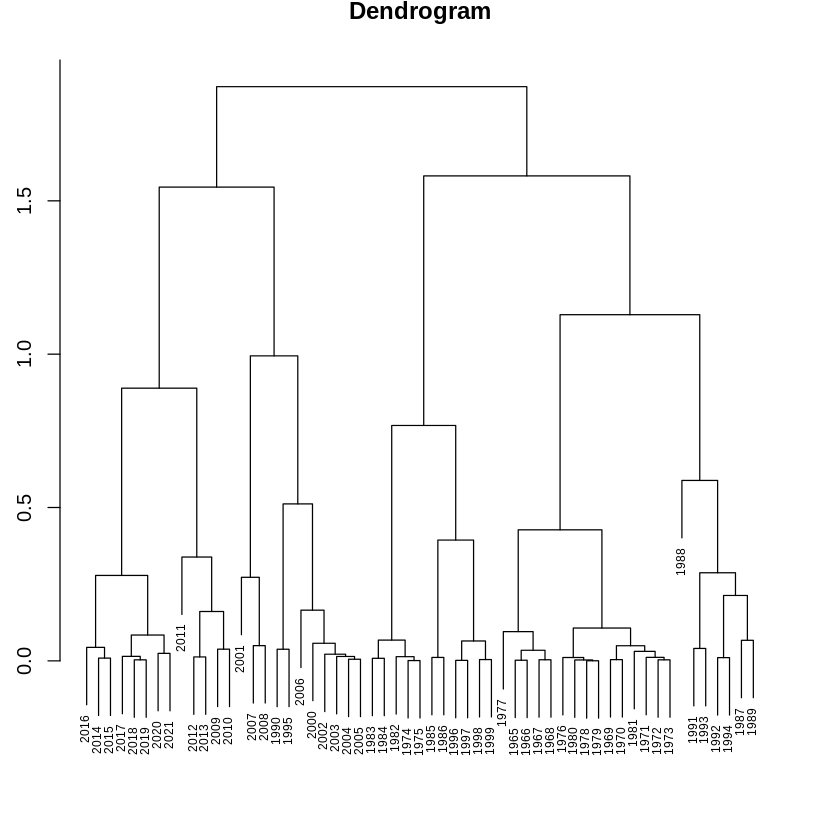

In [ ]:
# Assuming dist_matrix and other variables are already defined
hc <- hclust(as.dist(dist_matrix))

# Create a vector of years from 1965 onwards, based on the number of samples
years <- as.character(1965:(1964 + length(hc$order)))

# Plot the dendrogram with modified x-axis labels
par(pin = c(6, 6))
plot(hc, main = "Dendrogram", xlab = "Years", sub = "", cex = 0.6, labels = years)